# Classification Project

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

#import warnings
#warnings.filterwarnings("ignore")

from scipy import stats
import acquire
import prepare

## Acquire
    * Data acquired from Codeup database.
    * 24 columns and 7043 rows before cleaning.
    * Each row is a customer with the telco company.
    * Each column contains information about the customer and their services with telco.

## Prepare
    * Removed any duplicate rows from the dataset.
    * Dropped columns that had no useful information
    * Cleaned the total charges column and converted values to floats.
    * Filled null values in total charges with median value of column.
        * Median was used due to outliers skewing the mean.
    * Encoded categorical data.
    * Split the data into train, validate, split in a 50, 30, 20 split, stratified on churn.

In [2]:
# acquire the data
telco = acquire.get_telco_data()

In [3]:
# get information on the data
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   payment_type_id           7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
# easier viewing
telco.head().T

,0,1,2,3,4
internet_service_type_id,1,1,2,2,2
contract_type_id,2,1,1,1,1
payment_type_id,2,2,1,1,2
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes


In [5]:
# clean the data
telco_clean = prepare.prep_telco(telco)

In [6]:
# make sure the data is cleaned as expected
telco_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   senior_citizen                         7043 non-null   int64  
 2   partner                                7043 non-null   object 
 3   dependents                             7043 non-null   object 
 4   tenure                                 7043 non-null   int64  
 5   phone_service                          7043 non-null   object 
 6   multiple_lines                         7043 non-null   object 
 7   online_security                        7043 non-null   object 
 8   online_backup                          7043 non-null   object 
 9   device_protection                      7043 non-null   object 
 10  tech_support                           7043 non-null   object 
 11  stre

In [7]:
# verifying no nulls are present
telco_clean.isnull().sum()

gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
payment_type                             0
contract_type                            0
internet_service_type                    0
gender_Male                              0
partner_Yes                              0
dependents_Yes                           0
phone_servi

In [8]:
# calculating mean to see if it is useful for removing nulls
telco_clean.total_charges.mean()

2281.9169281556156

In [9]:
# comparing mean to median
telco_clean.total_charges.median()

1397.475

In [10]:
# finding outlier that may skew mean
telco_clean.total_charges.max()

8684.8

In [11]:
# split the data
train, validate, test = prepare.split_data(telco_clean, 'churn')

In [12]:
# confirm the split
train.shape, validate.shape, test.shape

((3943, 47), (1691, 47), (1409, 47))

In [13]:
telco_clean.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No
device_protection,No,No,Yes,Yes,No


In [14]:
telco_clean.shape

(7043, 47)

In [15]:
train.churn.value_counts(normalize=True)

No     0.73472
Yes    0.26528
Name: churn, dtype: float64

# Explore

### Bivariate
    * Is contract type related to churn?
    * Is internet service type related to churn?
    * Are monthly charges related to churn?
    * Are total charges related to churn?
    
### Multivariate
    * Does the amount that month-to-month contract types pay relate to churn?
    * Does the amount that fiber optic customers pay relate to churn?

## Does contract type impact churn?

In [16]:
# create a crosstab between contract type and churn

contract_crosstab = pd.crosstab(index=train['contract_type'], columns=train['churn'])

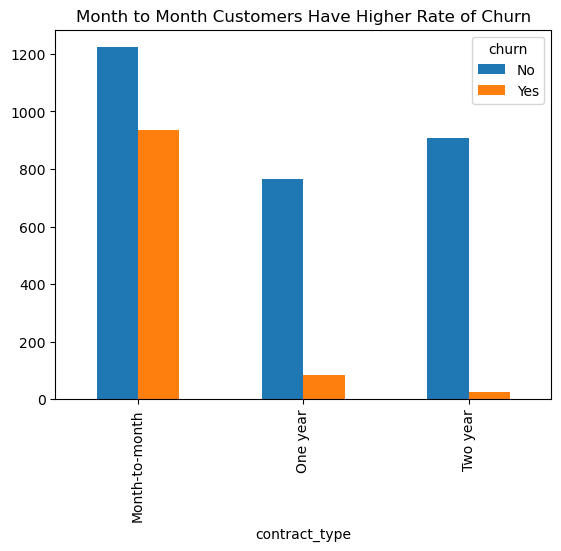

In [17]:
# visualize contract_type and churn

contract_crosstab.plot.bar()
plt.title("Month to Month Customers Have Higher Rate of Churn")
plt.show()

* Visually, there is a significant difference in churn for customers with month-to-month contracts.


**I will use a $\chi^2$ test to see if there is statistical significance.**

* I will use a confidence interval of 95% and an alpha of .05


**$H_0$: Contract type and churn are independent of one another.**<br>
**$H_A$: Contract type and churn are related.**

In [18]:
alpha = .05
chi2, p, degf, expected = stats.chi2_contingency(contract_crosstab)

print(f'p = {p}')

p = 6.90388763811534e-154


**The p-value is less than the alpha. Therefore, we reject the null hypothesis and continue with the understanding that there is a relationship between contract type and churn.**

## Does internet service type impact churn?

In [19]:
# create a crosstab of service type and churn

internet_crosstab = pd.crosstab(index=train['internet_service_type'], columns=train['churn'])

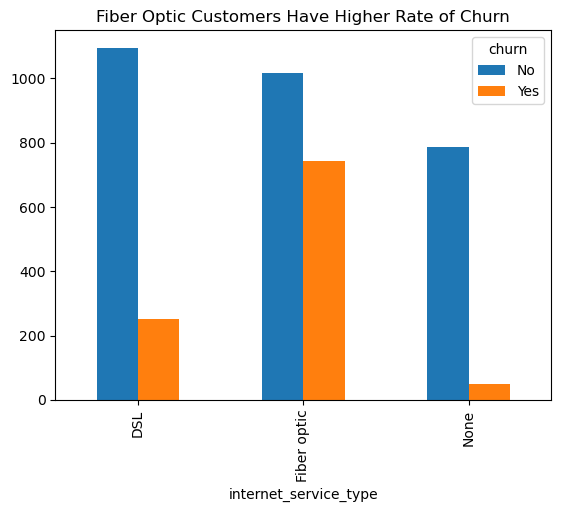

In [20]:
# visualize internet_service_type and churn

internet_crosstab.plot.bar()
plt.title("Fiber Optic Customers Have Higher Rate of Churn")
plt.show()

* Fiber optic customers have higher instances of churn than customers with DSL or no internet services.

**I will use a $\chi^2$ test to see if there is statistical significance.**

* I will use a confidence interval of 95% and an alpha of .05


**$H_0$: Internet service type and churn are independent of one another.**<br>
**$H_A$: Internet servive type and churn are related.**

In [21]:
alpha = .05

chi2, p, degf, expected = stats.chi2_contingency(internet_crosstab)

print(f'p = {p}')

p = 7.815797681295793e-98


**The p-value is less than the alpha. Therefore, we reject the null hypothesis and continue with the understanding that there is a relationship between internet service type and churn.**

## Do monthly charges impact churn?

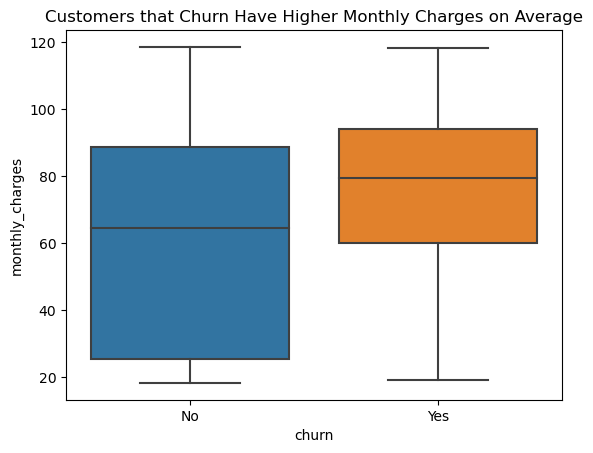

In [22]:
# visualize monthy_charges and churn
sns.boxplot(data=train, y='monthly_charges', x='churn')
plt.title("Customers that Churn Have Higher Monthly Charges on Average")
plt.show()

* Customers that churn have a higher monthly cost on average.

**I will use a Mann-Whitney u-test to determine any statistical significance.**
* There is not a normal distribution.
* The variances are not equal.
* I will use a confidence interval of 95% and an alpha of .05.

**$H_0$: Monthly charges of churn customers are lower than or equal to monthly charges of customers who do not churn.**<br>
**$H_A$: Monthly charges of churn customers are greater than monthly charges of customers who do not churn.**

In [23]:
# separate churn and non churn customer data
churn = train[train.churn =='Yes']
no_churn = train[train.churn == 'No']

In [24]:
# mann-whitney test for monthly charges
t, p = stats.mannwhitneyu(churn.monthly_charges, no_churn.monthly_charges, alternative="greater")

print(f'p = {p}')

p = 2.5550310599436916e-32


**The p-value is less than the alpha. Therefore, we reject the null hypothesis and continue with the understanding that customers who churn pay more in monthly charges than customers that do not churn.**

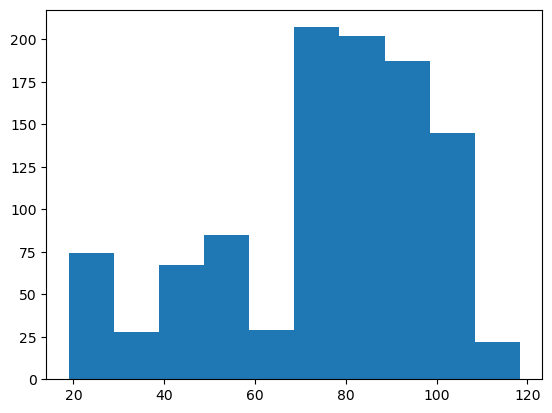

In [25]:
# show distribution of monthly charges of churn customers
plt.hist(churn.monthly_charges)
plt.show()

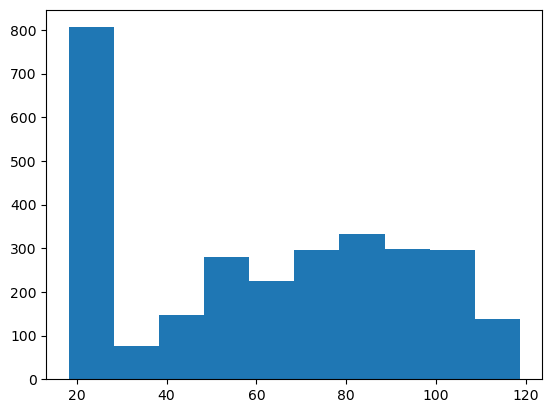

In [26]:
# distribution of monthly charges for customers that don't churn
plt.hist(no_churn.monthly_charges)
plt.show()

In [27]:
# check the variances
churn.monthly_charges.var(), no_churn.monthly_charges.var()

(561.2544773344791, 969.4465595255236)

## Do Total Charges Impact Customer Churn?

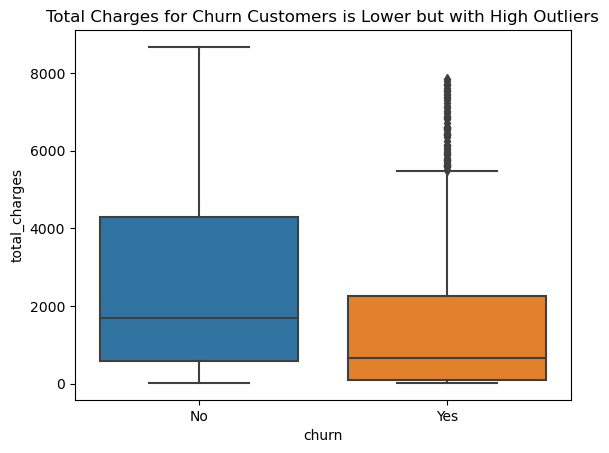

In [28]:
# visualize total_charges and churn

sns.boxplot(data=train, x='churn', y='total_charges')
plt.title("Total Charges for Churn Customers is Lower but with High Outliers")
plt.show()

* Initially, from the visualization it appears that customers who churn pay less total charges than customers that do not. However, there are large number of high outliers for churn customers in the data.

**I will use a Mann-Whitney u-test to determine any statistical significance.**
* There is not a normal distribution.
* The variances are not equal.
* I will use a confidence interval of 95% and an alpha of .05.

**$H_0$: Monthly charges of churn customers are lower than or equal to monthly charges of customers who do not churn.**<br>
**$H_A$: Monthly charges of churn customers are greater than monthly charges of customers who do not churn.**

In [29]:
# mann-whitney for total charges

t, p = stats.mannwhitneyu(churn.total_charges, no_churn.total_charges,alternative="greater")

print(f'p = {p}')

p = 1.0


**The p-value is less than the alpha. Therefore, we fail to reject the null hypothesis and will leave total charges out of model.**

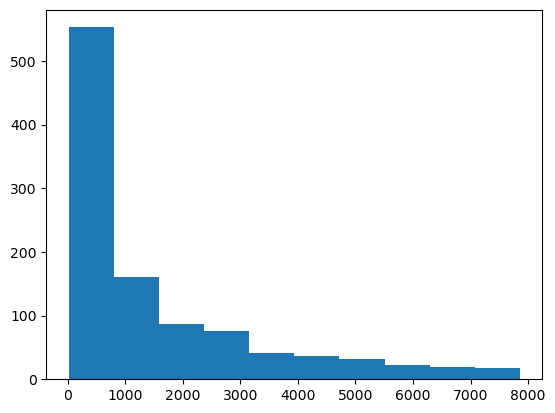

In [30]:
# show distribution of total charges for churn customers
plt.hist(churn.total_charges)
plt.show()

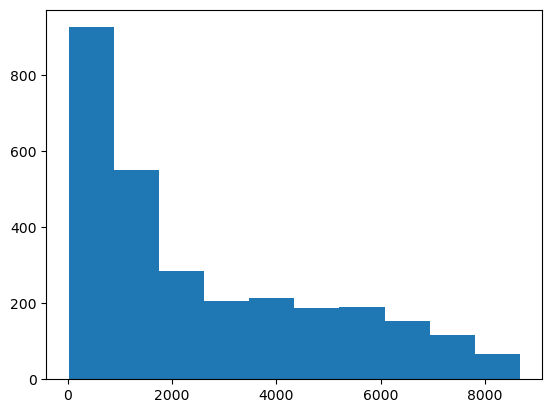

In [31]:
# show distribution of total charges in non churn customers
plt.hist(no_churn.total_charges)
plt.show()

In [32]:
# check variances
churn.total_charges.var(), no_churn.total_charges.var()

(3350213.3223284474, 5496108.169679938)

## Does tenure have an impact on churn?

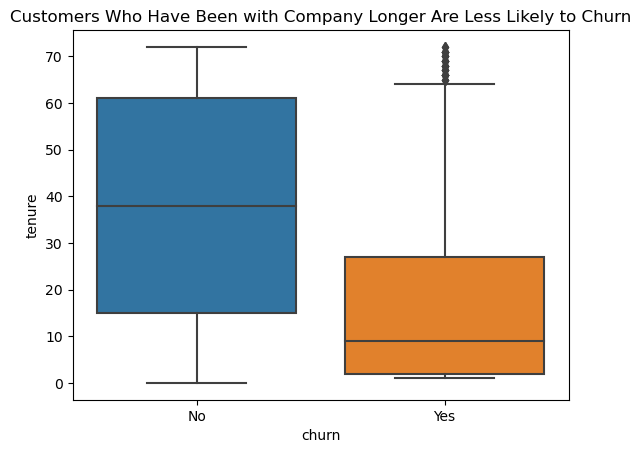

In [33]:
# visualize tenure vs churn

sns.boxplot(data=train, x="churn", y="tenure")
plt.title("Customers Who Have Been with Company Longer Are Less Likely to Churn")
plt.show()

* It appears that customers with longer tenure are less likely to churn.

**I will use a Mann-Whitney u-test to determine any statistical significance.**
* There is not a normal distribution.
* The variances are not equal.
* I will use a confidence interval of 95% and an alpha of .05.

**$H_0$: Tenure of churn customers is greater than or equal to tenure of customers who do not churn.**<br>
**$H_A$: Tenure of churn customers is less than tenure of customers who do not churn.**

In [34]:
# mann-whitney for tenure

t, p = stats.mannwhitneyu(churn.tenure, no_churn.tenure, alternative='less')

print(f'p = {p}')

p = 3.0717692013909187e-130


**The p-value is less than the alpha. Therefore, we reject the null hypothesis and continue with the understanding that customers who churn have shorter tenure than customers that do not churn.**

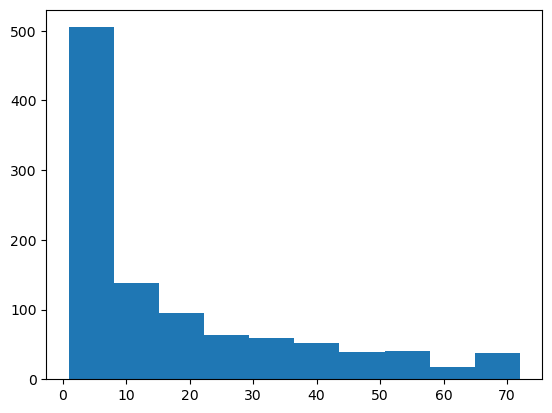

In [35]:
#show distribution of tenure of churn customers

plt.hist(churn.tenure)
plt.show()

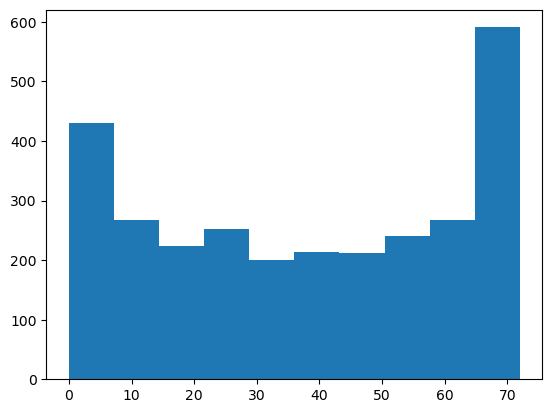

In [36]:
# show distribution of tenure of non churn customers

plt.hist(no_churn.tenure)
plt.show()

In [37]:
# show variance
churn.tenure.var(), no_churn.tenure.var()

(362.52989195568534, 583.2358455212741)

## Exploration Summary

* Contract type does have an impact on churn.<br>
    * *Month to month customers have a significantly higher rate of churn.*<br>
    
* Internet Service Type does have an impact on churn.<br>
    * *Fiber optics customers specifically have higher churn.*<br>
    
* Monthly charges do have an impact on churn. <br>

* Total charges does not have an impact on churn <br>
    * *Large number of outliers may have an impact on results.* <br>
    
* Tenure does have an impact on churn.
    * *There is statistical significance, though also a number of outliers for churn customers.*<br>

#### Features I will proceed with for model
* Contract Type, Internet Service Type, Monthly Charges, and Tenure


#### Features I will not proceed with for model
* Total charges

## Modeling

* I will use accuracy as my evaluation metric.
* No churn makes up 74% of data.

I will use the baseline of 74%, since guessing not churn for every customer would result in 74% accuracy.<br>
I will use four different models types.

In [38]:
train.head().T

,4610,5700,5684,1508,4479
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,Yes,Yes,Yes,Yes
dependents,Yes,No,Yes,Yes,Yes
tenure,14,50,35,27,49
phone_service,Yes,Yes,Yes,No,Yes
multiple_lines,No,Yes,No,No phone service,No
online_security,Yes,Yes,No internet service,No,Yes
online_backup,Yes,No,No internet service,Yes,Yes
device_protection,No,Yes,No internet service,Yes,No


In [39]:
# drop columns that won't be used in model

use_cols = ['churn_Yes', 'contract_type_One_year',
           'contract_type_Two_year',
           'tenure',
           'monthly_charges',
           'internet_service_type_Fiber_optic',
           'internet_service_type_None',]

train = train[use_cols]
validate = validate[use_cols]
test = test[use_cols]

# make model variables

X_train = train.drop(columns='churn_Yes')
y_train = train.churn_Yes

X_val = validate.drop(columns='churn_Yes')
y_val = validate.churn_Yes

X_test = test.drop(columns='churn_Yes')
y_test = test.churn_Yes

### Decision Tree

In [40]:
# create model
clf = DecisionTreeClassifier(max_depth=3, random_state=311)

In [41]:
# fit the model
clf = clf.fit(X_train, y_train)

In [42]:
y_pred_clf = clf.predict(X_train)

In [43]:
y_pred_proba_clf = clf.predict_proba(X_train)

In [44]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.80


In [45]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
      .format(clf.score(X_val, y_val)))

Accuracy of Decision Tree classifier on validate set: 0.77


In [46]:
# classification report

print(classification_report(y_train, y_pred_clf))


              precision    recall  f1-score   support

           0       0.82      0.93      0.87      2897
           1       0.69      0.41      0.52      1046

    accuracy                           0.80      3943
   macro avg       0.75      0.67      0.70      3943
weighted avg       0.78      0.80      0.78      3943



* Accuracy for Decision Tree is better than baseline on train and slightly better than baseline on validate.

## Random Forest

In [47]:
# create the model
rf = RandomForestClassifier(max_depth=3, min_samples_leaf=3, random_state=311)

In [48]:
# fit the model
rf = rf.fit(X_train, y_train)

In [49]:
y_pred_rf = rf.predict(X_train)

In [50]:
y_pred_proba_rf = rf.predict_proba(X_train)

In [51]:
# accuracy for training data
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.80


In [52]:
# accuracy for validate data
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(X_val, y_val)))

Accuracy of random forest classifier on validate set: 0.78


In [53]:
# classification report
print(classification_report(y_train, y_pred_rf))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87      2897
           1       0.70      0.41      0.52      1046

    accuracy                           0.80      3943
   macro avg       0.76      0.68      0.70      3943
weighted avg       0.79      0.80      0.78      3943



* Accuracy for Random Forest is better than baseline on train and slightly better than baseline on validate.

## KNN

In [54]:
# create model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [55]:
# fit the model
knn = knn.fit(X_train, y_train)

In [56]:
y_pred_knn = knn.predict(X_train)

In [57]:
y_pred_proba_knn = knn.predict_proba(X_train)

In [58]:
# accuracy for training data
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.84


In [59]:
#accuracy for validate data
print('Accuracy of KNN classifier on validate set: {:.2f}'
     .format(knn.score(X_val, y_val)))

Accuracy of KNN classifier on validate set: 0.75


In [60]:
# classification report
print(classification_report(y_train, y_pred_knn))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      2897
           1       0.72      0.64      0.68      1046

    accuracy                           0.84      3943
   macro avg       0.80      0.78      0.79      3943
weighted avg       0.84      0.84      0.84      3943



* Accuracy for KNN is better than baseline on train and slightly better than baseline on validate.

## Logistic Regression

In [61]:
# create model
logit = LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=311)

In [62]:
logit = logit.fit(X_train, y_train)

In [63]:
y_pred_logit = logit.predict(X_train)

In [64]:
y_pred_proba_logit = logit.predict_proba(X_train)

In [65]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.33


In [66]:
print('Accuracy of Logistic Regression classifier on validate set: {:.2f}'
     .format(logit.score(X_val, y_val)))

Accuracy of Logistic Regression classifier on validate set: 0.33


In [67]:
print(classification_report(y_train, y_pred_logit))

              precision    recall  f1-score   support

           0       1.00      0.09      0.17      2897
           1       0.28      1.00      0.44      1046

    accuracy                           0.33      3943
   macro avg       0.64      0.55      0.31      3943
weighted avg       0.81      0.33      0.24      3943



* Accuracy for Logistic Regression is worse than baseline for both training and validate data.